In [3]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43341 sha256=20dbc721c9a4c913b8a52956f02362145e79045ec7ca3de83c0053b3cf2c7103
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\1f\e8\d0\e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built NRCLex


In [ ]:
import nltk
nltk.download('all')

In [2]:
from textblob import TextBlob

texto = "Hola, esto es una prueba."
blob = TextBlob(texto)
print(blob.tags)

[('Hola', 'NNP'), ('esto', 'NN'), ('es', 'NN'), ('una', 'JJ'), ('prueba', 'NN')]


In [2]:
import pandas as pd
import ast
from nrclex import NRCLex
from collections import Counter, defaultdict
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

<Figure size 1400x800 with 0 Axes>

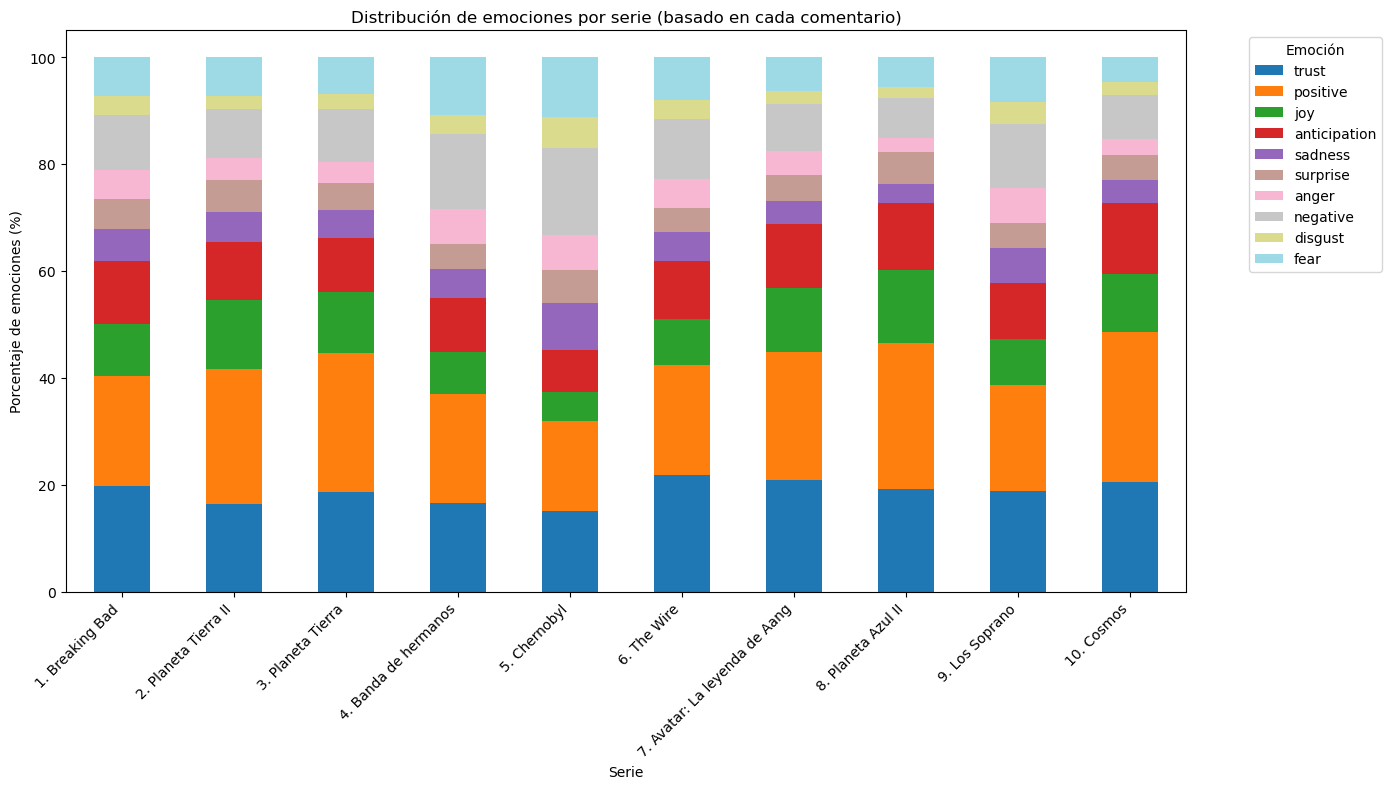

In [4]:

# Leer el archivo CSV
df = pd.read_csv("comentarios_series.csv")

# Convertir la columna de los comentarios a una lista
df['comentarios'] = df['comentarios'].apply(lambda x: ast.literal_eval(x))

# Expandir los comentarios por filas
df_expanded = df.explode('comentarios').reset_index(drop=True)

# Función para obtener emociones por comentario
def obtener_emociones(texto):
    emociones = NRCLex(texto).raw_emotion_scores
    return emociones

# Aplicar la función y guardar emociones por comentario
df_expanded['emociones'] = df_expanded['comentarios'].apply(obtener_emociones)

# Crear una estructura para acumular emociones por serie
from collections import Counter, defaultdict

emociones_por_serie = defaultdict(Counter)

# Acumular emociones por serie
for _, row in df_expanded.iterrows():
    serie = row['titulo']
    emociones = row['emociones']
    emociones_por_serie[serie].update(emociones)

# Convertir a DataFrame
df_emociones = pd.DataFrame(emociones_por_serie).fillna(0).T

# Calcular porcentajes
df_porcentajes = df_emociones.div(df_emociones.sum(axis=1), axis=0) * 100

# Graficar una barra apilada por serie
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
df_porcentajes.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Distribución de emociones por serie (basado en cada comentario)')
plt.ylabel('Porcentaje de emociones (%)')
plt.xlabel('Serie')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emoción', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
df_emociones

,trust,positive,joy,anticipation,sadness,surprise,anger,negative,disgust,fear
1. Breaking Bad,690,723,339,419,209,195,192,359,127,253
2. Planeta Tierra II,433,665,337,286,149,159,110,240,66,190
3. Planeta Tierra,603,834,367,329,168,160,132,319,90,221
4. Banda de hermanos,666,823,323,402,223,186,265,565,147,438
5. Chernobyl,690,775,246,360,402,288,297,749,260,517
6. The Wire,1087,1039,423,546,275,225,267,569,177,399
7. Avatar: La leyenda de Aang,862,981,496,496,177,197,186,362,98,264
8. Planeta Azul II,230,329,163,151,43,73,31,90,24,68
9. Los Soprano,757,790,349,420,266,182,264,486,159,340
10. Cosmos,763,1036,407,489,160,173,110,310,90,171


In [8]:
df_porcentajes

,trust,positive,joy,anticipation,sadness,surprise,anger,negative,disgust,fear
1. Breaking Bad,19.680548,20.621791,9.669139,11.950941,5.961209,5.561894,5.476326,10.239589,3.622362,7.216201
2. Planeta Tierra II,16.432638,25.237192,12.789374,10.853890,5.654649,6.034156,4.174573,9.108159,2.504744,7.210626
3. Planeta Tierra,18.709277,25.876513,11.386907,10.207881,5.212535,4.964319,4.095563,9.897611,2.792429,6.856966
4. Banda de hermanos,16.493314,20.381377,7.999009,9.955423,5.522536,4.606241,6.562655,13.992075,3.640416,10.846954
5. Chernobyl,15.052356,16.906632,5.366492,7.853403,8.769634,6.282723,6.479058,16.339442,5.671902,11.278360
6. The Wire,21.709607,20.750949,8.448173,10.904733,5.492311,4.493709,5.332534,11.364090,3.535051,7.968844
7. Avatar: La leyenda de Aang,20.927410,23.816460,12.041758,12.041758,4.297160,4.782714,4.515659,8.788541,2.379218,6.409323
8. Planeta Azul II,19.134775,27.371048,13.560732,12.562396,3.577371,6.073211,2.579035,7.487521,1.996672,5.657238
9. Los Soprano,18.863693,19.686020,8.696736,10.465986,6.628458,4.535260,6.578619,12.110640,3.962123,8.472464
10. Cosmos,20.571583,27.932057,10.973308,13.184147,4.313831,4.664330,2.965759,8.358048,2.426530,4.610407


In [10]:
df_expanded

,titulo,link,rating,años_al_aire,episodios,comentarios,emociones
0,1. Breaking Bad,https://www.imdb.com/title/tt0903747/reviews,9.5,2008–2013,62 episodios,I have never watched a show that is as consist...,"{'trust': 12, 'positive': 11, 'joy': 6, 'antic..."
1,1. Breaking Bad,https://www.imdb.com/title/tt0903747/reviews,9.5,2008–2013,62 episodios,Re-Watched it 7 times and counting. I guess I ...,{'surprise': 1}
2,1. Breaking Bad,https://www.imdb.com/title/tt0903747/reviews,9.5,2008–2013,62 episodios,"One of the greatest shows ever, the pacing is ...","{'joy': 3, 'positive': 5, 'trust': 4, 'anticip..."
3,1. Breaking Bad,https://www.imdb.com/title/tt0903747/reviews,9.5,2008–2013,62 episodios,I cannot stress enough how good this show is. ...,"{'negative': 2, 'anticipation': 1, 'joy': 1, '..."
4,1. Breaking Bad,https://www.imdb.com/title/tt0903747/reviews,9.5,2008–2013,62 episodios,"Breaking Bad is absolutely, without a doubt, o...","{'fear': 2, 'negative': 5, 'sadness': 3, 'trus..."
...,...,...,...,...,...,...,...
948,10. Cosmos,https://www.imdb.com/title/tt2395695/reviews,9.2,2014,13 episodios,Excellent I'm looking forward to the second on...,"{'positive': 2, 'anticipation': 1}"
949,10. Cosmos,https://www.imdb.com/title/tt2395695/reviews,9.2,2014,13 episodios,I am a Physicist and have watched all episodes...,"{'positive': 14, 'trust': 10, 'anticipation': ..."
950,10. Cosmos,https://www.imdb.com/title/tt2395695/reviews,9.2,2014,13 episodios,The original series was a masterpiece ! ! ! Wh...,"{'trust': 19, 'joy': 4, 'positive': 23, 'antic..."
951,10. Cosmos,https://www.imdb.com/title/tt2395695/reviews,9.2,2014,13 episodios,This short series really struck me. It makes m...,"{'trust': 5, 'positive': 2, 'negative': 1}"


In [12]:
df_porcentajes.to_csv("emociones_por_series.csv")

In [16]:
def emocion_dominante(emociones):
    if emociones:
        return max(emociones, key=emociones.get)
    return "No Emotion"

df_expanded['emocion_dominante'] = df_expanded['emociones'].apply(emocion_dominante)

# Diccionario para acumular palabras por emoción
palabras_por_emocion = defaultdict(Counter)

# Stopwords en inglés
stop_words = set(stopwords.words('english'))

# Limpiar y acumular palabras por emoción
for _, row in df_expanded.iterrows():
    emocion = row['emocion_dominante']
    comentario = row['comentarios']
    
    # Tokenizar y limpiar
    palabras = word_tokenize(comentario.lower())
    palabras_limpias = [p for p in palabras if p.isalpha() and p not in stop_words]
    
    # Acumular palabras por emoción
    palabras_por_emocion[emocion].update(palabras_limpias)

# Convertir el diccionario a un DataFrame
df_palabras_emociones = pd.DataFrame.from_dict(
    {emocion: dict(contador.most_common(10)) for emocion, contador in palabras_por_emocion.items()},
    orient='index'
).fillna(0).T

print(df_palabras_emociones)

                trust  surprise  positive  anticipation  anger  negative  \
show            691.0       3.0     544.0          55.0    3.0     111.0   
series          343.0       0.0     452.0          28.0    0.0      65.0   
one             193.0       0.0     382.0          37.0    0.0      68.0   
like            154.0       0.0     311.0           0.0    0.0      58.0   
characters      153.0       0.0     207.0           0.0    0.0       0.0   
best            131.0       0.0       0.0          25.0    7.0       0.0   
tv              131.0       3.0       0.0          28.0    4.0       0.0   
time            126.0       0.0     201.0          51.0    0.0      43.0   
watch           124.0       3.0       0.0          67.0    0.0       0.0   
even            123.0       0.0     204.0           0.0    0.0      37.0   
life              0.0       3.0       0.0           0.0    0.0       0.0   
much              0.0       3.0       0.0           0.0    0.0       0.0   
back        

In [10]:
df_palabras_emociones.to_csv("palabras_emociones.csv")